### Intro to IPython Notebook

In [1]:
import sys
print(sys.version)

3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


This is the IPython Notebook. It is an interface for running python code and exploring data.

You can create a *new line* in a box of code by typing Enter. You can *run* a box (or 'cell') of code by typing Shift-Enter. I've constructed some cells of code below. Use **Shift-Enter** to run them to see what the output is. After each box, I encourage you to explore by adding a box of your own (you can use the "Insert->Insert Cell Above/Below" menu command) and writing similar code to the box I've provided. The boxes all control a global python workspace, so things you do in one box can make changes to subsequent boxes.

A lot of Python documentation is available online. A good place to start is the official Python tutorial: https://docs.python.org/2/tutorial/index.html. Other useful documentation can be found at some of the following links, or use google:

* https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* http://www.scipy-lectures.org/

The simplest code you can run is the `print` command. Comments are text that lies after a # symbol, and are ignored by Python.

In [2]:
print("Hello World") # This is a comment.

Hello World


### Working with values

Python can be used to perform calculations on constant values.

In [3]:
print(2 + 3)

5


    * is the multiplication operator

In [4]:
print(2 * 3)

6


** is the to-the-power-of operator

In [5]:
print(2**3)

8


**Exercises:** 

1. What's unexpected about the division operator / ?
1. Does python obey the correct order of operations (BEDMAS rules)?
1. What does the modulus operator do?

There are lots of other mathematical operators, for example as shown here http://www.tutorialspoint.com/python/python_basic_operators.htm.

### Variables

We can put values into boxes called *variables*. The value of a variable can change during your program, but be referred to by the same name. The equals sign (=) is used here as the assignment operator: it assigns the value on the right-hand side to the variable on the left-hand side.

In [7]:
a = 2
print("First time: a =", a + 3)
a = 3
print("Second time: a =", a + 3)

First time: a = 5
Second time: a = 6


### Functions

Lots of jobs we need to do in Python are performed by functions. Functions are called using their name, followed by a pair of round brackets containing whatever parameters (inputs) the function needs. If it needs no inputs, leave the brackets empty but they must still be included. A simple function is the `len` function, which returns the length of its parameter.

In [9]:
print(len("Hello"))

5


If the `len` function is given a parameter it doesn't know how to give the length of, it will return an error.

In [10]:
print(len(6))

TypeError: object of type 'int' has no len()

### Numpy

Normally, variables hold just one value at a time. Using the `numpy` library, a variable can refer to a rectangular grid of numbers, known as an *array*, which will be useful for processing biomechanical data. To use the numpy library, we first need to import it, so Python knows about it. In the line below we import numpy and give it a shortened nickname "np" to refer to it easily.

I will refer provide links for further reading in the numpy basics documentation, which can be found online: http://docs.scipy.org/doc/numpy/user/basics.html.

In [11]:
import numpy as np

To create a numpy array, we can use the `array` function, which takes one parameter, a `list` of values or `list` of `lists` indicating the shape of the array to create. See also: http://docs.scipy.org/doc/numpy/user/basics.creation.html.

### Arrays

A numpy array can have any number of dimensions, rows, and columns. For example, a 2-D vector would have just 2 elements...

In [12]:
my_vector = np.array([2,3])
print(my_vector)

[2 3]


whereas we could represent a 2-D vector changing over 5 time samples as a grid of 2 columns (the individual vectors) and 5 rows. Here we create an array and assign it to the name other_vector, so you shouldn't see any output.

In [13]:
other_vector = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])

(Obviously, this would be a painful way to enter data, so we'll explore some better ways soon.)

In [14]:
print(other_vector)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


### Simple indexing

To refer to a subset of elements within an array, we can use indexing. The index of the first row or column of an array is 0.

In [15]:
print(other_vector[0,0]) # the element in the first row and first column
print(other_vector[2,1]) # the element in the third row and second column

1
6


This generalized to `array[row, column]`. The indexes for each dimension are separated by a comma.

If you want to refer to several elements within a dimension at once, you can use a *slice*. The syntax for a slice is (instead of a single value) the first element you want to include then a colon then the first element you want to exclude.

In [16]:
print(other_vector[1:4,1]) # the elements in the second, third, and fourth rows of the second column.

[4 6 8]


If you want to start at the first element or end with the last element, you can leave that number out.

In [17]:
print(other_vector[:3,0]) # the elements in the first, second, and third rows of the first column.

[1 3 5]


To refer to a whole row, leave out both numbers and just use a colon. If it's the last dimension, you can leave it out completely.

In [18]:
print(other_vector[:,0]) # the whole first column
print(other_vector[2,:]) # the whole third row
print(other_vector[2])   # also the whole third row

[1 3 5 7 9]
[5 6]
[5 6]


**Exercise:** How do you get just the last three elements of the second column (i.e. 6, 8, 10)?

### Array methods and properties

If we want to find the shape of an array at any time we can use the shape *property* of the array, accessed by typing ".shape" after the array name. Tip: after typing the "." after the name, you can use tab and autocomplete to see all available properties and methods an object has available. *Methods* are functions that specifically belong to a particular object; like other functions they need the round brackets for the parameter list. *Properties* do not require brackets.

In [19]:
print(other_vector.shape)

(5, 2)


### Loading data

Numpy has a `genfromtxt` function that will load data from a text file into an array.

First of all, use a text editor (for example Notepad), to look at the file 'tutorial_data.csv'. CSV stands for "comma-separated value", which means that each number in the row is separated by a comma, and each row is separated from the other by a new-line character.

Functions can take two types of parameters (inputs): positional parameters (where their order is important) and keyword parameters. Keyword parameters must come after positional parameters, and are given with a `keyword=value` syntax.

In the case below, we're using one positional parameter 'tutorial_data.csv', the name of the file to read, and two keyword parameters `delimiter` (given the value of a comma) and `skiprows` (given the value 2). The `delimiter` parameter tells `genfromtxt` which character separates each item, and `skiprows` tells the function how many lines to ignore at the top of the file (header lines).

We're going to put the result of the `genfromtxt` function into a variable named `data` so we can refer to it later.

In [20]:
data = np.genfromtxt('tutorial_data.csv', delimiter=",", skip_header=2)

**Exercise:** Create a line below and print the shape of data to get an idea of what we've loaded.

You should get a 100 x 13 array, i.e. 100 time points x 13 columns.

You can hopefully see from the CSV file that the 13 columns are `Field` (sample number), then the $x$, $y$, and $z$ components of each of `RTOE`, `RHJC` (right hip joint centre), `RKJC` (right knee joint centre), and `RAJC` (right ankle joint centre). For convenience, we can give some of these columns names.

In [21]:
samples = data[:,0]

### Plotting

2-D plotting can be performed using the matplotlib library. To use it, we have to do import the library and tell ipython how to display the plots.

Examples of all the different sorts of plots matplotlib can generate can be found here: http://matplotlib.org/gallery.html.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Now we can use the plot function to generate a plot, for example of RHEE:X against time.

The plot command syntax is described here: http://matplotlib.org/api/pyplot_api.html?highlight=pyplot.plot#matplotlib.pyplot.plot.

It takes the $x$ values (in this case all values in the time column), then the $y$ values (all values in RHEE:X column), and plots them using a black ('k') line ('-'). I've also added some labels to the axes.

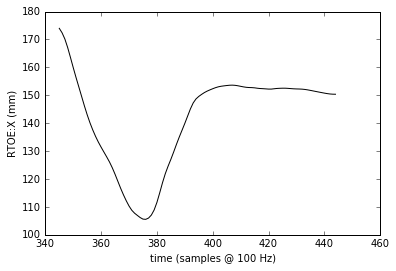

In [23]:
plt.plot(samples, data[:,1], 'k-')
plt.xlabel('time (samples @ 100 Hz)')
plt.ylabel('RTOE:X (mm)')

To plot the all x, y, and z components of the RTOE marker, we could just specify the correct slice for the y values...

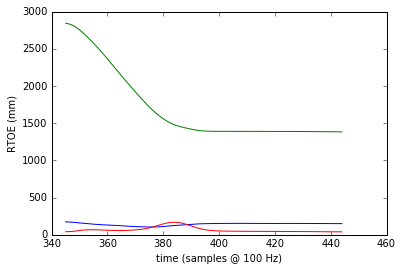

In [24]:
plt.plot(samples, data[:,1:4], '-')
plt.xlabel('time (samples @ 100 Hz)')
plt.ylabel('RTOE (mm)')

(It is possible to add a legend to the plot to label the 'x', 'y', and 'z' lines, but we'll leave that for another session.)

These data have been collected on the SES Vicon system, meaning $x$ is across the direction of walking, $y$ is along the walkway, and $z$ is vertical.

**Exercises:** In which direction (+ve $y$ or -ve $y$) was the subject walking for this trial? Explain why the plot of RTOE:Y looks like it does.

We could also plot the RAJC:Z and RKJC:Z values, using two different plot commands, which will both be drawn on the same axes.

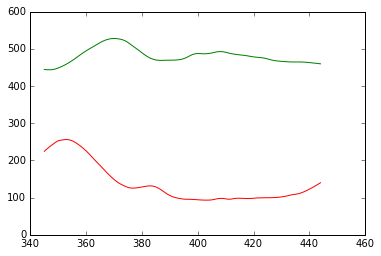

In [25]:
plt.plot(samples, data[:,12], 'r-') # RAJC:Z
plt.plot(samples, data[:,9], 'g-') # RKJC:Z

**Exercise:** Use the documentation for the plot function (linked to above) to make the knee line thicker and blue.

### Array mathematics

Arrays of numbers can be operated on just like single numbers. For example, adding a scalar to a vector adds that value to each element.

In [26]:
a = np.array([1,2,3])
print(a + 3)

[4 5 6]


When two arrays are being added, the corresponding elements are added together. If the arrays have different shapes, that will usually raise an error. Hint: this is like adding two vectors.

In [27]:
b = np.array([3,2,7])
print(a + b)

[ 4  4 10]


Similarly, multiplication of a vector by a scalar works as expected.

In [28]:
print(a * 0.44)

[ 0.44  0.88  1.32]


Hint: this is equivalent to multiplying a segment vector by a COM fraction of segment length.

We can also use this array maths to concisely calculate segment vectors from our joint centres.

First of all, let's make an array that is contains all the y, and z values (for 2-D analysis) from our ankle and knee joint centres.

In [29]:
rajc = data[:,11:]
rkjc = data[:,8:10]

Now we remember our definition of the shank segment as the vector from knee to ankle, i.e.

$\vec{v}_\mathsf{shank} = p_\mathsf{ankle} − p_\mathsf{knee}$

This can be calculated as...

In [30]:
shank = rajc - rkjc

... which has now done that subtraction in $y$ and $z$, at all time points.

To calculate the angle of a segment, we can use the arctan2 function from the `numpy` library. If the arguments are vectors of equal size, then `arctan2` will calculate the inverse tangent for each pair of corresponding elements from each vector.

For example, if our inputs were:

    a = np.array([2,3])
    b = np.array([5,9])

Then the result of `np.arctan2(a, b)` would be...

    np.arctan2(a[0], b[0]), np.arctan2(a[1], b[1])

i.e.
    
    np.arctan2(2, 5), np.arctan2(3, 9)

We can use this to calculate the angle at all the time points simultaneously.

In [31]:
shank_angle = np.arctan2(shank[:,1], shank[:,0])

**Exercise:** What units do you think this angle is in? Hint: If you're stuck, check the documentation online: http://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html

### Writing your own functions

Very often when writing code, functions that do exactly what you want are not available. Then you can write your own. Writing small functions that do specific jobs is also good coding practice as it helps with debugging and making your code more testable and reusable.

To define a new function, we use the def keyword, followed by the function name, then a list of parameters in brackets (which may be empty), and finally a colon. The 'body' of the function must be indented consistently to let python know which code belongs inside it. We use the return keyword to return a value from the function.

Here, we'll write a function couple of functions. The first, just_two will take no inputs and will return the value 2.

In [32]:
def just_two():
    return 2

Now we can use the function just like others wee have already seen.


In [33]:
print(just_two())

2


This next function, add_two, will take one input parameter, called number, add 2 to it, and return that value.

In [34]:
def add_two(number):
    result = number + 2
    return result

In [35]:
print(add_two(3))

5


Obviously, we would normally write more complex functions, like the ones coming up in the 'Differentiating' section.

### Differentiating

To calculate velocity from your position data, you need to differentiate the values.

Fortunately, we know formulas for numerical differentiation (e.g. from http://www1.i2r.a-star.edu.sg/~wongtc/numericaldifferentiation.html) that we can implement.

For example:

3-pt differentiation

$f_1^{(1)} = \dfrac{f_2 − f_0}{2h}$

3-pt double differentiation

$f_1^{(2)} = \dfrac{f_2 − 2f_1 + f_0}{h^2}$

We can write these as new functions. Indexing is used to create new arrays with offset time points to give us the previous and next samples as required by the formula. The other rule used here is that negative index values start counting from the end, so `arr[-1]` is the last sample and `arr[1:-1]` means everything except the first and last samples. In order for this to work, the three lists of numbers $f_0$, $f_1$, and $f_2$ must all have the same length (number of numbers).

In [36]:
def dbl_diff_3pt(arr, h):
    f1 = arr[1:-1]
    f0 = arr[:-2]
    f2 = arr[2:]
    return (f2 - 2 * f1 + f0) / h**2

**Exercise:** Write the function for 3-pt single differentiation, given by the first formula above.

The `dbl_diff_3pt` function performs all its operations along the first dimension of the input arr. This means it doesn't care if there are extra dimensions following it, which means that we can use this function to differentiate a vector in $x$, $y$, and $z$ simultaneously.

In [37]:
dt = 1 / 100. # Data were collected at 100 Hz.
knee_acceleration = dbl_diff_3pt(rkjc, dt)

Even more helpful, numpy has a built-in differentiation function gradient [http://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html#numpy.gradient], to save us doing the work of writing a new function (but note, this is single differentiation only - to get double differentiation, you could apply it twice).

**Exercise:** compare the results of np.gradient and your single differentiation function in a plot.

### More documentation

This tutorial has covered the essentials you would need for doing your assignment, but has barely scratched the surface of what Python can do. For example, in the scipy libraries are Fourier Transform functions, filtering, and curve fitting functions I've used to generate the plots in early 303 lectures.

To see what else it is capable of, have a look at some of these sources:

* the notebook files I've posted on CourseBuilder pages for various lectures.
* the numpy tutorial http://wiki.scipy.org/Tentative_NumPy_Tutorial
* the scipy and numpy documentation http://docs.scipy.org/doc/

or just google keywords like: python, numpy, scipy, tutorial, science.